In [1]:
#Import Library Scikit Learn untuk Decision Tree, Dataset & Matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#Load Dataset Wine dari library scikit learn
wine = datasets.load_wine()
features = wine['data']
target = wine['target']
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [3]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
# Membuat Objek Model Decision Tree
decisiontree = DecisionTreeClassifier(random_state=0, max_depth=None, 
                                      min_samples_split=2, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None, 
                                      min_impurity_decrease=0)

In [6]:
#Mentraining Model Decision Tree
model = decisiontree.fit(features, target)

In [7]:
test = model.predict(features)

In [8]:
test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
#Mengambil sampel observasi dan membuat prediksi
#Sampel berupa data dimensi kelopak
#Fungsi predict() => memeriksa kelas yang dimilikinya
#Fungsi predict_proba() => memeriksa probabilitas kelas dari prediksi tersebut
observation = [[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]]
model.predict(observation)
model.predict_proba(observation)

print(observation)
print(model.predict(observation))
# print(model.predict_proba(observation))

[[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]]
[0]


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, test)
print(cm)

[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


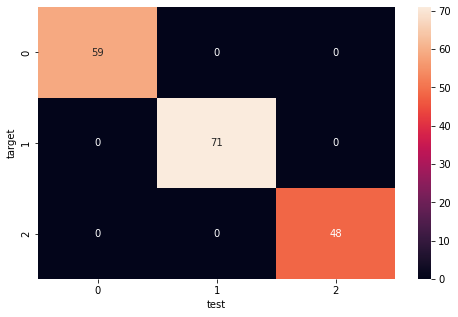

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(target, test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("test")
plt.ylabel("target")
plt.show()

In [12]:
from sklearn.metrics import classification_report
print (classification_report(target, test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [13]:
#Membuat grafik visualisasi Decision Tree
import pydotplus
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(decisiontree, out_file=None, 
                                feature_names=wine['feature_names'], 
                                class_names=wine['target_names'])
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png('wine.png')

True

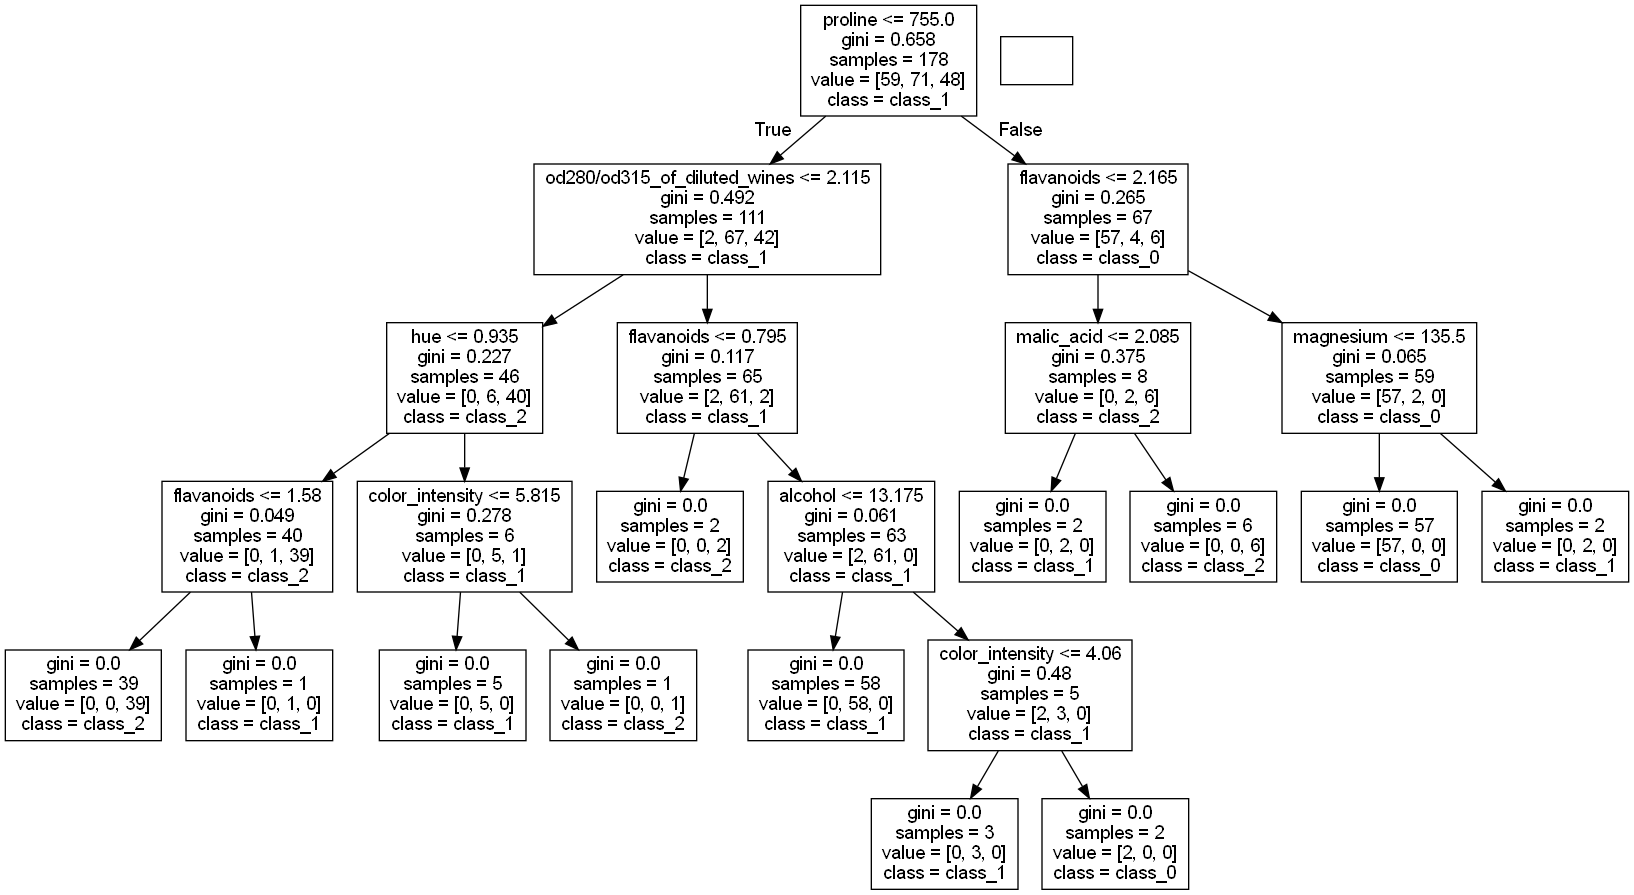

In [14]:
from IPython.display import Image

Image(filename='wine.png')